In [1]:
import numpy as np
from PIL import Image

In [2]:
img_data = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]]
], dtype=np.uint8)

img = Image.fromarray(img_data)
img.save('test.png')

In [3]:
batch_size = 1
net_size = 16
h_size = 32
x_res = 10
y_res = 10
scaling = 1.0
c_dim = 3

In [4]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def std_normal(row, col):
    return np.random.standard_normal((row, col)).astype(np.float32)

In [8]:
hid_vec = np.random.uniform(-1, 1, (batch_size, h_size)).astype(np.float32)

# Generate a grid of points
num_points = x_res * y_res
x_range = np.linspace(-1*scaling, scaling, x_res)
y_range = np.linspace(-1*scaling, scaling, y_res)

x_mat = np.matmul(np.ones((y_res, 1)), x_range.reshape((1, x_res)))
y_mat = np.matmul(y_range.reshape((y_res, 1)), np.ones((1, x_res)))
r_mat = np.sqrt(x_mat**2 + y_mat**2)
r_mat

array([[1.41421356, 1.26686158, 1.1439589 , 1.05409255, 1.0061539 ,
        1.0061539 , 1.05409255, 1.1439589 , 1.26686158, 1.41421356],
       [1.26686158, 1.09994388, 0.95581392, 0.84619701, 0.7856742 ,
        0.7856742 , 0.84619701, 0.95581392, 1.09994388, 1.26686158],
       [1.1439589 , 0.95581392, 0.7856742 , 0.64788354, 0.56655772,
        0.56655772, 0.64788354, 0.7856742 , 0.95581392, 1.1439589 ],
       [1.05409255, 0.84619701, 0.64788354, 0.47140452, 0.35136418,
        0.35136418, 0.47140452, 0.64788354, 0.84619701, 1.05409255],
       [1.0061539 , 0.7856742 , 0.56655772, 0.35136418, 0.15713484,
        0.15713484, 0.35136418, 0.56655772, 0.7856742 , 1.0061539 ],
       [1.0061539 , 0.7856742 , 0.56655772, 0.35136418, 0.15713484,
        0.15713484, 0.35136418, 0.56655772, 0.7856742 , 1.0061539 ],
       [1.05409255, 0.84619701, 0.64788354, 0.47140452, 0.35136418,
        0.35136418, 0.47140452, 0.64788354, 0.84619701, 1.05409255],
       [1.1439589 , 0.95581392, 0.7856742

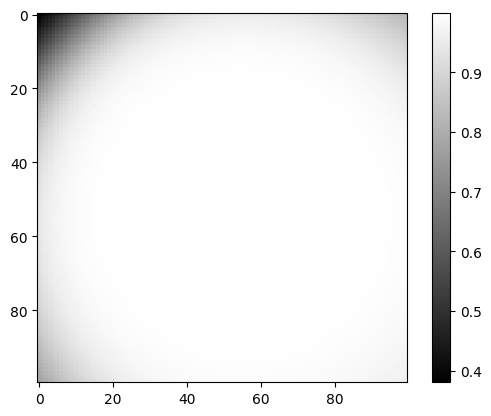

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gaussian(x):
    return np.exp(-np.power(x, 2))

def sine(x):
    return np.sin(x)

def identity(x):
    return x

# Define the CPPN class
class CPPN:
    def __init__(self, weights, functions):
        self.weights = weights
        self.functions = functions
    
    def evaluate(self, x, y):
        inputs = np.array([x, y])
        output = 0
        for weight, function in zip(self.weights, self.functions):
            output += weight * function(inputs)
        return sigmoid(output)

# Create a sample CPPN with weights and functions
weights = [10.0, 1.0, 1.0]
functions = [
    lambda coords: gaussian(np.linalg.norm(coords)),
    lambda coords: sine(coords[0]),
    lambda coords: identity(coords[1])
]

cppn = CPPN(weights, functions)

# Generate a pattern on a 2D grid
grid_size = 100
pattern = np.zeros((grid_size, grid_size))
for i in range(grid_size):
    for j in range(grid_size):
        x = (i - grid_size // 2) / (grid_size // 2)
        y = (j - grid_size // 2) / (grid_size // 2)
        pattern[i, j] = cppn.evaluate(x, y)

# Visualize the pattern
plt.imshow(pattern, cmap='gray')
plt.colorbar()
plt.show()
